# Importing Libraries

In [1]:
# Importing Libraries
import praw
import csv
from datetime import datetime
import os
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing libraries
import os
import pandas as pd
import re
import emoji
import unicodedata
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from translatepy import Translator
from tqdm import tqdm

# Data Extraction from Reddit API

In [2]:
# Importing Libraries
# import praw
# import csv
# from datetime import datetime
# import os
# from tqdm import tqdm
# import time
# import warnings
# warnings.filterwarnings('ignore')

# # Filling reddit api credentials 
# client_id = 'QL8pAnDmsWBGG4Mr3JBmUQ'
# client_secret = 'gE-FO4x_vE4W90JuN-jfYC2SumC_0A'
# user_agent = 'mental_health_project by /u/your_reddit_username'

# # Initializing Reddit API
# reddit = praw.Reddit(client_id=client_id,
#                      client_secret=client_secret,
#                      user_agent=user_agent)

# # Setting output file and folder 
# current_dir = os.getcwd()  # Compatible with Jupyter and scripts
# output_dir = os.path.join(current_dir, 'output')
# os.makedirs(output_dir, exist_ok=True)
# output_file = os.path.join(output_dir, 'reddit_mentalhealth_combined.csv')

# Function to extract reddit data by passing sub reddit and limit as parameters
# def extract_reddit_data(subreddit_name, limit=500):
#     subreddit = reddit.subreddit(subreddit_name)
#     data = []
#     post_count = 0

#     print(f"\n Extracting up to {limit} posts from r/{subreddit_name}...")
#     for post in tqdm(subreddit.new(limit=limit), desc=f"Posts r/{subreddit_name}"):
#         post_count += 1
#         data.append([
#             "post", post.id, "", str(post.author),
#             datetime.utcfromtimestamp(post.created_utc).isoformat(),
#             post.score, post.title, post.selftext,
#             post.subreddit.display_name,
#             post.link_flair_text, post.url, "",
#             post.upvote_ratio,
#             post.ups,       # Upvotes count
#             post.downs      # Downvotes count
#         ])

#         time.sleep(1.5) # adding delay

#         post.comments.replace_more(limit=0)
#         for comment in post.comments.list():
#             data.append([
#                 "comment", post.id, comment.id, str(comment.author),
#                 datetime.utcfromtimestamp(comment.created_utc).isoformat(),
#                 comment.score, "", comment.body,
#                 post.subreddit.display_name,
#                 "", "", comment.parent_id,
#                 "",            # no upvote_ratio for comments
#                 comment.ups,   # Upvotes count
#                 comment.downs  # Downvotes count
#             ])

#     return data, post_count

# Function to save to csv file
# def save_to_csv(data, filename):
#     with open(filename, mode='w', encoding='utf-8', newline='') as f:
#         writer = csv.writer(f)
#         writer.writerow([
#             "type", "post_id", "comment_id", "author", "created_utc", "score",
#             "title", "text", "subreddit", "flair", "url", "parent_id",
#             "upvote_ratio", "upvotes", "downvotes"
#         ])
#         writer.writerows(data)
#     print(f"\n Data saved to: {filename}")

# # Main script logic
# total_posts_needed = 10000
# subreddits = [
#     'depression', 'anxiety', 'mentalhealth', 'SuicideWatch', 'depression_help',
#     'offmychest', 'TrueOffMyChest', 'confession', 'lonely', 'socialanxiety',
#     'BPD', 'ADHD', 'PTSD', 'OCD', 'decidingtobebetter',
#     'KindVoice', 'therapy', 'CPTSD'
# ]

# num_subs = len(subreddits)
# chunk_limit = total_posts_needed // num_subs

# total_posts_collected = 0
# all_data = []

# for sub in subreddits:
#     if total_posts_collected >= total_posts_needed:
#         break

#     remaining = total_posts_needed - total_posts_collected
#     limit_for_sub = min(chunk_limit, remaining)

#     sub_data, posts_fetched = extract_reddit_data(sub, limit=limit_for_sub)
#     all_data.extend(sub_data)
#     total_posts_collected += posts_fetched

#     print(f" Collected {total_posts_collected} posts so far...")

# # Saving final dataset
# save_to_csv(all_data, output_file)

In [2]:
# Getting current working directory
current_dir = os.getcwd()
original_dir = current_dir
# Defining path to 'output' folder
output_dir = os.path.join(current_dir, 'output')

# Defining full path to the CSV file
output_file = os.path.join(output_dir, 'reddit_mentalhealth_combined.csv')

# Loading CSV using pandas
df = pd.read_csv(output_file)

# Previewing the first few rows
print(df.head())

   type  post_id comment_id                author          created_utc  score  \
0  post  1lf4g6e        NaN  Medical-Teaching-405  2025-06-19T07:11:08      1   
1  post  1lf4emr        NaN      Ok-Broccoli-1906  2025-06-19T07:08:25      1   
2  post  1lf4bx2        NaN        AsideSuper7951  2025-06-19T07:03:32      1   
3  post  1lf4bva        NaN  Glass_Marionberry_33  2025-06-19T07:03:27      1   
4  post  1lf48hv        NaN              Bannatan  2025-06-19T06:57:44      1   

                                               title  \
0                   Life isn't quite what I expected   
1                    Why can't things just be right?   
2  Is there anything at all to do with life becom...   
3  Feeling really alone, just need someone kind t...   
4                                I m so numb CW vent   

                                                text   subreddit flair  \
0  Hello, I've been in a dark place for the last ...  depression   NaN   
1  Literally nothing at all 

In [3]:
# Filter rows where type = 'post'
post = df[df['type'] == 'post']

# Save filtered DataFrame to a new CSV
post_file = os.path.join(output_dir, 'reddit_posts_only.csv')
post.to_csv(post_file, index=False)

print(f"Saved {len(post)} rows to {post_file}")

Saved 9990 rows to C:\Users\praja\Downloads\UOA_FYP\FYP\Final_project_code\output\reddit_posts_only.csv


# Pre-processing

In [11]:
# Getting current working directory
current_dir = os.getcwd()

# Defining path to 'output' folder
output_dir = os.path.join(current_dir, 'output')

# Defining full path to the CSV file
input_file = os.path.join(output_dir, 'reddit_posts_only.csv')
output_file = os.path.join(output_dir, 'pre_processed_data.csv')

In [12]:
# Enable tqdm for pandas apply
tqdm.pandas()

# ======================
# Setup
# ======================
EMOTION_MAP = {
    # 😢 Sad / Negative / Depressed
    "😭": "crying",
    "💔": "broken_heart",
    "😔": "sad",
    "😢": "tears",
    "😞": "disappointed",
    "😓": "anxious",
    "😟": "worried",
    "🙁": "unhappy",
    "😩": "exhausted",
    "😫": "tired",
    "😖": "frustrated",
    "😣": "distressed",
    "🥺": "pleading",
    "😿": "crying_cat",
    "☹️": "frowning",
    
    # 🙂 Neutral / Thinking
    "😐": "neutral",
    "🤔": "thinking",
    "🙄": "eye_roll",
    
    # 😀 Happy / Positive (less emphasized)
    "😂": "laughing",
    "😁": "grinning",
    "😊": "happy",
    "😍": "love",
    "❤": "love",
    "🤗": "hugging",
    "🎉": "celebration"
}

stop_words = set(stopwords.words('english'))
translator = Translator()

# ======================
# Helper Functions
# ======================
def expand_contractions(text):
    return contractions.fix(text)

def handle_special_characters(text):
    text = str(text)
    text = re.sub(r'[\u200b-\u200f\u202a-\u202e]', '', text)  # invisible chars
    text = re.sub(r'[❤♡♥]', 'heart', text)
    text = re.sub(r'[★☆✮✯]', 'star', text)
    text = unicodedata.normalize('NFKD', text)
    return text.encode('ascii', 'ignore').decode('ascii')

def replace_emojis(text):
    for emoji_char, label in EMOTION_MAP.items():
        text = text.replace(emoji_char, label)
    return text

def translate_to_english(text):
    try:
        if not text.strip():
            return text
        result = translator.translate(text, "English")
        translated_text = result.result
        if translated_text.strip().lower() == text.strip().lower():
            return text
        else:
            return translated_text
    except Exception:
        return text

# ======================
# Main Preprocessing Function
# ======================
def preprocess_text(raw_text: str) -> str:
    text = str(raw_text).strip()
    
    # 1. Replace emojis first
    text = replace_emojis(text)
    
    # 2. Translate, expand, handle special chars
    text = text.lower()
    text = translate_to_english(text)
    text = expand_contractions(text)
    text = handle_special_characters(text)
    
    # 3. Remove unwanted punctuation (keep underscores)
    text = re.sub(r"[^\w\s]", " ", text)
    
    # 4. Tokenize and remove stopwords
    tokens = [t for t in text.split() if t not in stop_words]
    
    return " ".join(tokens)

try:
    df = pd.read_csv(input_file)
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

df['title'] = df['title'].astype(str).str.strip()
df['text'] = df['text'].astype(str).str.strip()

df = df[~((df['title'] == '') & (df['text'] == ''))]
df = df[~df['text'].str.lower().isin(['removed', 'deleted'])]
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()[:400]))

# Apply clean_text with progress bar
df['title'] = df['title'].progress_apply(preprocess_text)
df['text'] = df['text'].progress_apply(preprocess_text)

df['processed_text'] = df['title'] + " " + df['text']
df = df[df['processed_text'].str.strip() != '']

# ======================
# 3. SAVE OUTPUT
# ======================

try:
    df.to_csv(output_file, index=False)
    print("Cleaned data saved successfully to:", output_file)
except Exception as e:
    print(f"Error saving file: {e}")


100%|██████████| 9990/9990 [55:59<00:00,  2.97it/s]  


Cleaned data saved successfully to: C:\Users\praja\Downloads\UOA_FYP\FYP\Final_project_code\output\pre_processed_data.csv


In [79]:
# Getting current working directory
current_dir = os.getcwd()
original_dir = current_dir

# Defining path to 'output' folder
output_dir = os.path.join(current_dir, 'output')

# Defining file paths
input_file = os.path.join(output_dir, 'pre_processed_data.csv')

# Reading the CSV
df = pd.read_csv(input_file)
df

,type,post_id,comment_id,author,created_utc,score,title,text,subreddit,flair,url,parent_id,upvote_ratio,upvotes,downvotes,processed_text
0,post,1lf4g6e,NaN,Medical-Teaching-405,2025-06-19T07:11:08,1,life quite expected,hello dark place last 2 years reached lowest p...,depression,NaN,https://www.reddit.com/r/depression/comments/1...,NaN,1.00,1,0,life quite expected hello dark place last 2 ye...
1,post,1lf4emr,NaN,Ok-Broccoli-1906,2025-06-19T07:08:25,1,cannot things right,literally nothing ever go right anymore makes ...,depression,NaN,https://www.reddit.com/r/depression/comments/1...,NaN,1.00,1,0,cannot things right literally nothing ever go ...
2,post,1lf4bx2,NaN,AsideSuper7951,2025-06-19T07:03:32,1,anything life becoming depressing,listen seriously asking happiness child life s...,depression,NaN,https://www.reddit.com/r/depression/comments/1...,NaN,1.00,1,0,anything life becoming depressing listen serio...
3,post,1lf4bva,NaN,Glass_Marionberry_33,2025-06-19T07:03:27,1,feeling really alone need someone kind talk call,hi really hard time right need someone kind ta...,depression,NaN,https://www.reddit.com/r/depression/comments/1...,NaN,1.00,1,0,feeling really alone need someone kind talk ca...
4,post,1lf48hv,NaN,Bannatan,2025-06-19T06:57:44,1,numb cw vent,kind new still figuring functions forgive xd s...,depression,NaN,https://www.reddit.com/r/depression/comments/1...,NaN,1.00,1,0,numb cw vent kind new still figuring functions...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,post,1lc1qu1,NaN,limeandlemons-,2025-06-15T14:33:32,1,unsure pursue diagnosis,somebody know suggested might cptsd based read...,CPTSD,Question,https://www.reddit.com/r/CPTSD/comments/1lc1qu...,NaN,0.67,1,0,unsure pursue diagnosis somebody know suggeste...
9986,post,1lc1pxe,NaN,Alexxx3001,2025-06-15T14:32:23,1,addictions various forms,mother stepfather became militant jehovahs wit...,CPTSD,Trigger Warning: Addiction,https://www.reddit.com/r/CPTSD/comments/1lc1px...,NaN,0.67,1,0,addictions various forms mother stepfather bec...
9987,post,1lc1kfa,NaN,LankyComputer8192,2025-06-15T14:25:26,4,date cptsd,wondering people cptsd deal dating case family...,CPTSD,Question,https://www.reddit.com/r/CPTSD/comments/1lc1kf...,NaN,0.83,4,0,date cptsd wondering people cptsd deal dating ...
9988,post,1lc1j7t,NaN,Joanna_Flock,2025-06-15T14:23:57,6,fathers day tough anyone else,tw emotional abuse mental abuse struggling lot...,CPTSD,Trigger Warning: Physical Abuse,https://www.reddit.com/r/CPTSD/comments/1lc1j7...,NaN,0.88,6,0,fathers day tough anyone else tw emotional abu...


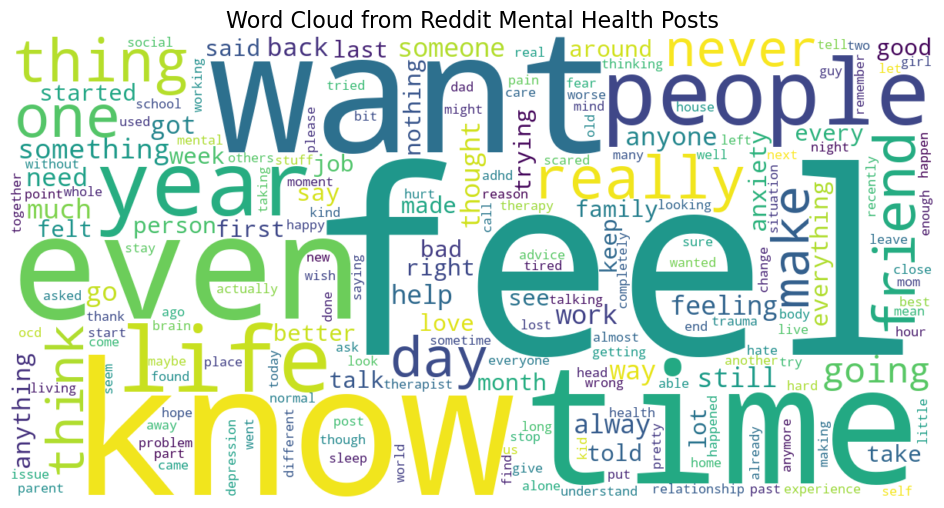

In [80]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df['processed_text'].astype(str).tolist())

# Step 6: Generate the word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', collocations=False).generate(all_text)

# Step 7: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Reddit Mental Health Posts', fontsize=16)
plt.show()

# Model Training (RoBERTa Model)

In [81]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Labels mapping for this model
labels = ['Negative', 'Neutral', 'Positive']


In [82]:
def get_sentiment(text):
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    output = model(**encoded_input)
    scores = output.logits.detach().numpy()[0]
    probs = np.exp(scores) / np.exp(scores).sum()
    return dict(zip(labels, probs))


In [83]:
# from tqdm import tqdm
# import os
# import pandas as pd
# tqdm.pandas()

# # Assume get_sentiment defined already

# output_dir = os.path.join(original_dir, 'output')
# input_file = os.path.join(output_dir, 'pre_processed_data.csv')

# df = pd.read_csv(input_file)

# sentiment_df = df['processed_text'].progress_apply(get_sentiment).apply(pd.Series)
# df = pd.concat([df, sentiment_df], axis=1)

# df.to_csv(os.path.join(output_dir, 'reddit_with_sentiment.csv'), index=False)

In [91]:
output_dir = os.path.join(original_dir, 'output')
input_file = os.path.join(output_dir, 'reddit_with_sentiment.csv')

df = pd.read_csv(input_file)

# Print the first few rows of the relevant columns
print(df[['processed_text', 'Positive', 'Negative', 'Neutral']].head())

                                      processed_text  Positive  Negative  \
0  life quite expected hello dark place last 2 ye...  0.366019  0.130774   
1  cannot things right literally nothing ever go ...  0.023553  0.844635   
2  anything life becoming depressing listen serio...  0.008474  0.910358   
3  feeling really alone need someone kind talk ca...  0.750861  0.018823   
4  numb cw vent kind new still figuring functions...  0.084200  0.548817   

    Neutral  
0  0.503207  
1  0.131811  
2  0.081168  
3  0.230316  
4  0.366983  


**Whole dataset taking before scaling**

In [92]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Step 1: Load your CSV ---
output_dir = os.path.join(original_dir, 'output')
input_file = os.path.join(output_dir, 'reddit_with_sentiment.csv')
df = pd.read_csv(input_file)

# --- Step 2: Define mapping for valence and arousal ---
# Sentiment weight mapping
valence_map = {
    'Positive': 1.0,
    'Neutral': 0.0,
    'Negative': -1.0
}

arousal_map = {
    'Positive': 0.7,
    'Neutral': 0.5,
    'Negative': 0.8
}

# --- Step 3: Compute valence and arousal for each row ---
df['valence'] = (
    df['Positive'] * valence_map['Positive'] +
    df['Neutral']  * valence_map['Neutral'] +
    df['Negative'] * valence_map['Negative']
)

df['arousal'] = (
    df['Positive'] * arousal_map['Positive'] +
    df['Neutral']  * arousal_map['Neutral'] +
    df['Negative'] * arousal_map['Negative']
)

# --- Step 4: Compute severity ---
# Higher severity = negative valence & high arousal
df['raw_severity'] = -df['valence'] * df['arousal']

# Normalize severity between 0 and 1 for easier interpretation
scaler = MinMaxScaler()
df['severity'] = scaler.fit_transform(df[['raw_severity']])

# --- Step 5: Save results ---
output_file = os.path.join(output_dir, 'reddit_with_valence_arousal_severity.csv')
df.to_csv(output_file, index=False)

# --- Step 6: Check sample output ---
print(df[['processed_text', 'Positive', 'Negative', 'Neutral', 'valence', 'arousal', 'severity']].head())
print(f"\nProcessed file saved to: {output_file}")

                                      processed_text  Positive  Negative  \
0  life quite expected hello dark place last 2 ye...  0.366019  0.130774   
1  cannot things right literally nothing ever go ...  0.023553  0.844635   
2  anything life becoming depressing listen serio...  0.008474  0.910358   
3  feeling really alone need someone kind talk ca...  0.750861  0.018823   
4  numb cw vent kind new still figuring functions...  0.084200  0.548817   

    Neutral   valence   arousal  severity  
0  0.503207  0.235245  0.612436  0.369604  
1  0.131811 -0.821082  0.758101  0.892673  
2  0.081168 -0.901884  0.774802  0.944750  
3  0.230316  0.732039  0.655819  0.140317  
4  0.366983 -0.464617  0.681485  0.683978  

Processed file saved to: C:\Users\praja\Downloads\UOA_FYP\FYP\Final_project_code\output\reddit_with_valence_arousal_severity.csv


**Per-row normalization (individual scaling)**

In [93]:
# # --- Step 2: Define mapping for valence and arousal ---
# # Sentiment weight mapping
# valence_map = {
#     'Positive': 1.0,
#     'Neutral': 0.0,
#     'Negative': -1.0
# }

# arousal_map = {
#     'Positive': 0.7,
#     'Neutral': 0.5,
#     'Negative': 0.8
# }

# # --- Step 3: Compute valence and arousal for each row ---
# df['valence'] = (
#     df['Positive'] * valence_map['Positive'] +
#     df['Neutral']  * valence_map['Neutral'] +
#     df['Negative'] * valence_map['Negative']
# )

# df['arousal'] = (
#     df['Positive'] * arousal_map['Positive'] +
#     df['Neutral']  * arousal_map['Neutral'] +
#     df['Negative'] * arousal_map['Negative']
# )

# # --- Step 4: Compute severity ---
# # Higher severity = negative valence & high arousal
# df['raw_severity'] = -df['valence'] * df['arousal']

# # Normalize per-row using sigmoid (so always 0–1, matches single-text function)
# df['severity'] = df['raw_severity'].apply(lambda x: 1 / (1 + np.exp(-x)))

# # --- Step 5: Save results ---
# output_file = os.path.join(output_dir, 'reddit_with_valence_arousal_severity.csv')
# df.to_csv(output_file, index=False)

# # --- Step 6: Check sample output ---
# print(df[['processed_text', 'Positive', 'Negative', 'Neutral', 'valence', 'arousal', 'severity']].head())
# print(f"\nProcessed file saved to: {output_file}")

In [94]:
# output_dir = os.path.join(original_dir, 'output')
# input_file = os.path.join(output_dir, 'reddit_with_valence_arousal_severity.csv')

# df = pd.read_csv(input_file)

# # Print the first few rows of the relevant columns
# print(df[['processed_text', 'Positive', 'Negative', 'Neutral', 'valence', 'arousal', 'severity']].head())

In [95]:
# # Top 3 highest severity
# top3 = df.sort_values(by='severity', ascending=False).head(3)
# print("Top 3 Highest Severity:")
# print(top3[['processed_text', 'severity']])

# # Top 3 lowest severity
# bottom3 = df.sort_values(by='severity', ascending=True).head(3)
# print("\nTop 3 Lowest Severity:")
# print(bottom3[['processed_text', 'severity']])


In [96]:
output_dir = os.path.join(original_dir, 'output')
input_file = os.path.join(output_dir, 'reddit_with_valence_arousal_severity.csv')

df = pd.read_csv(input_file)

# Print the first few rows of the relevant columns
print(df[['processed_text', 'Positive', 'Negative', 'Neutral', 'valence', 'arousal', 'severity']].head())

                                      processed_text  Positive  Negative  \
0  life quite expected hello dark place last 2 ye...  0.366019  0.130774   
1  cannot things right literally nothing ever go ...  0.023553  0.844635   
2  anything life becoming depressing listen serio...  0.008474  0.910358   
3  feeling really alone need someone kind talk ca...  0.750861  0.018823   
4  numb cw vent kind new still figuring functions...  0.084200  0.548817   

    Neutral   valence   arousal  severity  
0  0.503207  0.235245  0.612436  0.369604  
1  0.131811 -0.821082  0.758101  0.892673  
2  0.081168 -0.901884  0.774802  0.944750  
3  0.230316  0.732039  0.655819  0.140317  
4  0.366983 -0.464617  0.681485  0.683978  


In [97]:
# Top 3 highest severity
top3 = df.sort_values(by='severity', ascending=False).head(3)
print("Top 3 Highest Severity:")
print(top3[['processed_text', 'severity']])

# Top 3 lowest severity
bottom3 = df.sort_values(by='severity', ascending=True).head(3)
print("\nTop 3 Lowest Severity:")
print(bottom3[['processed_text', 'severity']])


Top 3 Highest Severity:
                                         processed_text  severity
1959  life seriously worst like cannot say much peop...  1.000000
1785  want fucking die nothing left want hurt people...  0.999299
6688  hate hate ptsd stupid shit like jesus christ g...  0.998878

Top 3 Lowest Severity:
                                         processed_text  severity
2297  anyone everyone sees post hello alone amazing ...  0.000000
3277  love girlfriend said love first time weekend f...  0.000140
8191  memorable summer 15f friends love summer thoug...  0.005794


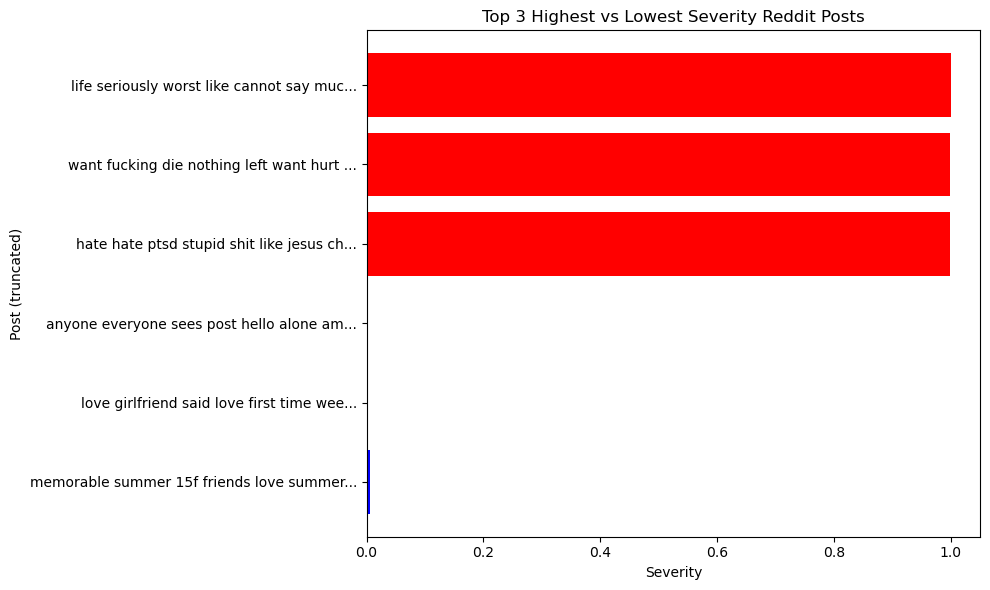

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Get top 3 highest and lowest severity
top3 = df.sort_values(by='severity', ascending=False).head(3)
bottom3 = df.sort_values(by='severity', ascending=True).head(3)

# Combine for plotting
combined = pd.concat([top3, bottom3])
combined = combined[['processed_text', 'severity']]

# Shorten text for readability
combined['short_text'] = combined['processed_text'].str.slice(0, 40) + "..."

# Plot
plt.figure(figsize=(10,6))
plt.barh(combined['short_text'], combined['severity'], color=['red' if x in top3['severity'].values else 'blue' for x in combined['severity']])
plt.xlabel("Severity")
plt.ylabel("Post (truncated)")
plt.title("Top 3 Highest vs Lowest Severity Reddit Posts")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


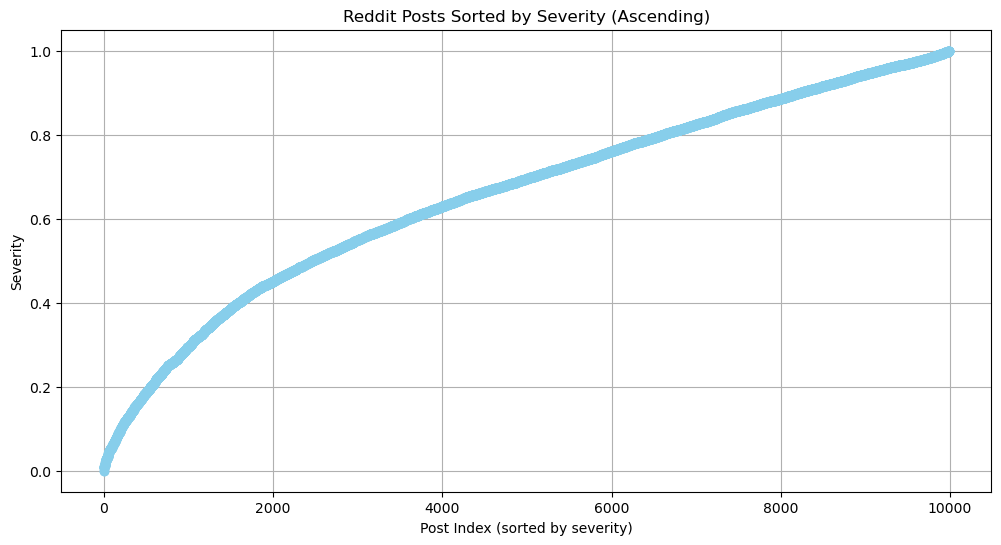

In [41]:
# Sort by severity ascending
df_sorted = df.sort_values(by='severity', ascending=True).reset_index(drop=True)

# Plot severity values in order
plt.figure(figsize=(12,6))
plt.plot(df_sorted.index, df_sorted['severity'], marker='o', linestyle='-', color='skyblue')
plt.xlabel("Post Index (sorted by severity)")
plt.ylabel("Severity")
plt.title("Reddit Posts Sorted by Severity (Ascending)")
plt.grid(True)
plt.show()

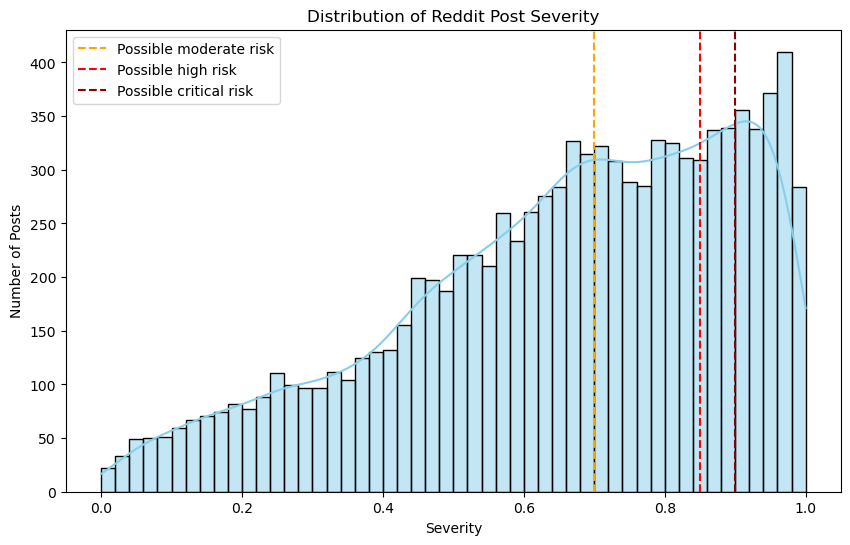

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['severity'], bins=50, kde=True, color='skyblue')
plt.xlabel("Severity")
plt.ylabel("Number of Posts")
plt.title("Distribution of Reddit Post Severity")
plt.axvline(0.7, color='orange', linestyle='--', label='Possible moderate risk')
plt.axvline(0.85, color='red', linestyle='--', label='Possible high risk')
plt.axvline(0.9, color='darkred', linestyle='--', label='Possible critical risk')
plt.legend()
plt.show()


In [43]:
import numpy as np

# Compute key percentiles
p50 = np.percentile(df['severity'], 50)  # median
p75 = np.percentile(df['severity'], 75)  # top 25%
p90 = np.percentile(df['severity'], 90)  # top 10%
p95 = np.percentile(df['severity'], 95)  # top 5%

print(f"Median severity: {p50:.2f}")
print(f"75th percentile: {p75:.2f}")
print(f"90th percentile: {p90:.2f}")
print(f"95th percentile: {p95:.2f}")


Median severity: 0.70
75th percentile: 0.86
90th percentile: 0.94
95th percentile: 0.97


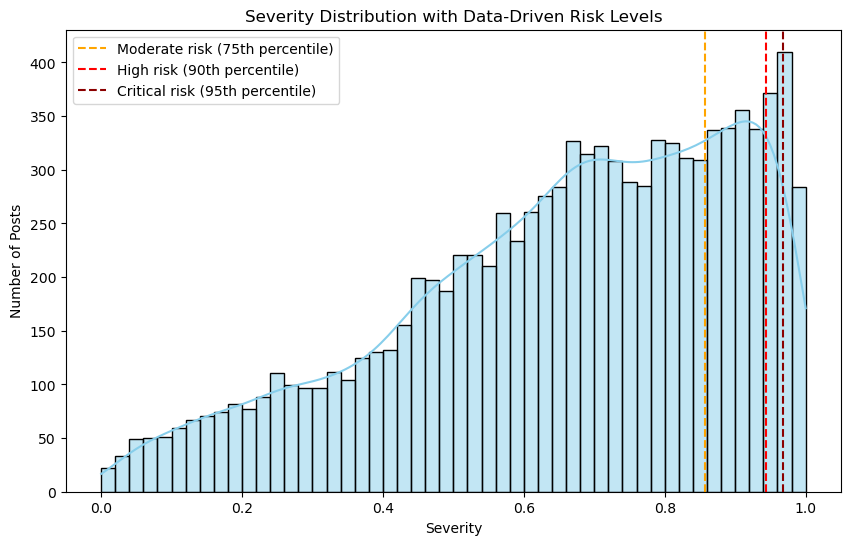

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['severity'], bins=50, kde=True, color='skyblue')

# Add data-driven thresholds
plt.axvline(p75, color='orange', linestyle='--', label='Moderate risk (75th percentile)')
plt.axvline(p90, color='red', linestyle='--', label='High risk (90th percentile)')
plt.axvline(p95, color='darkred', linestyle='--', label='Critical risk (95th percentile)')

plt.xlabel("Severity")
plt.ylabel("Number of Posts")
plt.title("Severity Distribution with Data-Driven Risk Levels")
plt.legend()
plt.show()


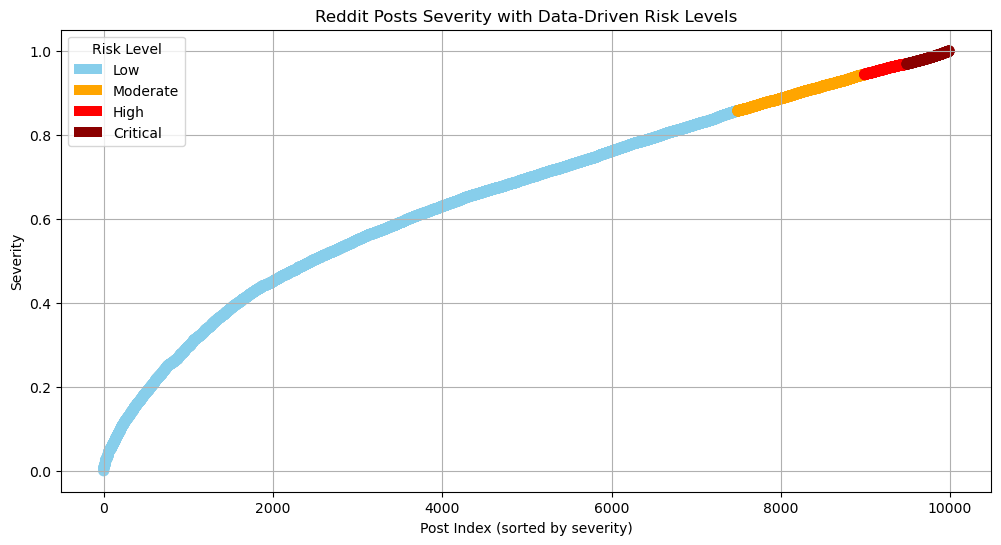

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load CSV
df = pd.read_csv("output/reddit_with_valence_arousal_severity.csv")

# Compute percentiles for data-driven thresholds
p75 = np.percentile(df['severity'], 75)  # Moderate
p90 = np.percentile(df['severity'], 90)  # High
p95 = np.percentile(df['severity'], 95)  # Critical

# Assign risk levels
def assign_risk(sev):
    if sev <= p75:
        return "Low"
    elif sev <= p90:
        return "Moderate"
    elif sev <= p95:
        return "High"
    else:
        return "Critical"

df['risk_level'] = df['severity'].apply(assign_risk)

# Sort by severity for plotting
df_sorted = df.sort_values(by='severity').reset_index(drop=True)

# Map colors to risk levels
color_map = {
    "Low": "skyblue",
    "Moderate": "orange",
    "High": "red",
    "Critical": "darkred"
}
colors = df_sorted['risk_level'].map(color_map)

# Plot
plt.figure(figsize=(12,6))
scatter = plt.scatter(df_sorted.index, df_sorted['severity'], c=colors, s=50, alpha=0.7)

# Create a legend manually
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[r], label=r) for r in color_map]
plt.legend(handles=legend_elements, title="Risk Level")

plt.xlabel("Post Index (sorted by severity)")
plt.ylabel("Severity")
plt.title("Reddit Posts Severity with Data-Driven Risk Levels")
plt.grid(True)
plt.show()


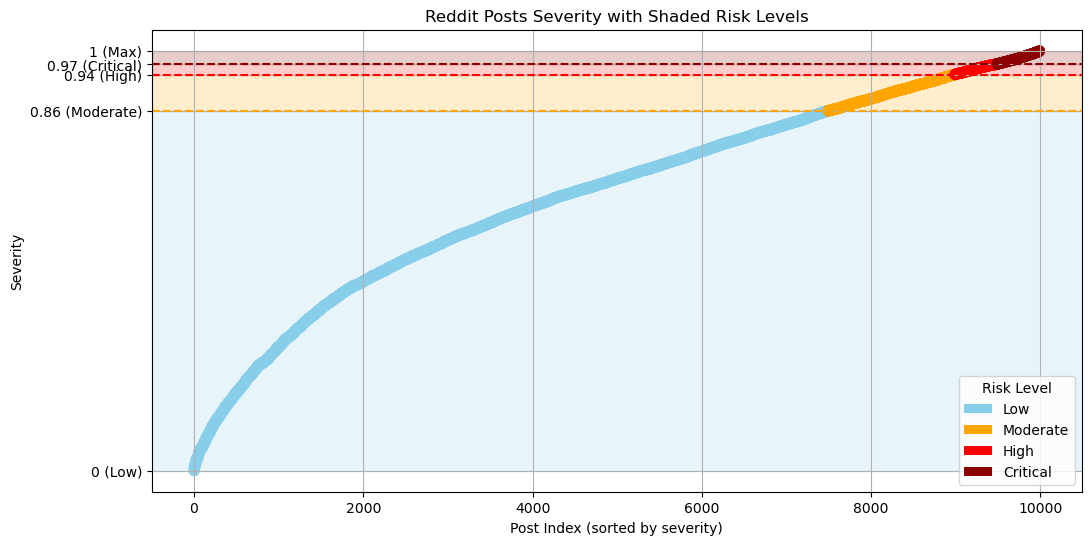

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

# Load CSV
df = pd.read_csv("output/reddit_with_valence_arousal_severity.csv")

# Compute percentiles for thresholds
p75 = np.percentile(df['severity'], 75)  # Moderate
p90 = np.percentile(df['severity'], 90)  # High
p95 = np.percentile(df['severity'], 95)  # Critical

# Assign risk levels
def assign_risk(sev):
    if sev <= p75:
        return "Low"
    elif sev <= p90:
        return "Moderate"
    elif sev <= p95:
        return "High"
    else:
        return "Critical"

df['risk_level'] = df['severity'].apply(assign_risk)

# Save CSV with risk_level column
output_file = "output/reddit_with_valence_arousal_severity_with_risk.csv"
df.to_csv(output_file, index=False)

# Sort by severity
df_sorted = df.sort_values(by='severity').reset_index(drop=True)

# Map colors
color_map = {
    "Low": "skyblue",
    "Moderate": "orange",
    "High": "red",
    "Critical": "darkred"
}
colors = df_sorted['risk_level'].map(color_map)

# Plot
plt.figure(figsize=(12,6))

# Background shading for risk levels
plt.axhspan(0, p75, color='skyblue', alpha=0.2)
plt.axhspan(p75, p90, color='orange', alpha=0.2)
plt.axhspan(p90, p95, color='red', alpha=0.2)
plt.axhspan(p95, 1, color='darkred', alpha=0.2)

# Scatter plot of posts
plt.scatter(df_sorted.index, df_sorted['severity'], c=colors, s=50, alpha=0.7)

# Add horizontal lines for thresholds
plt.axhline(p75, color='orange', linestyle='--')
plt.axhline(p90, color='red', linestyle='--')
plt.axhline(p95, color='darkred', linestyle='--')

# Customize y-axis ticks with threshold values
ticks = sorted(list(set([0, p75, p90, p95, 1])))
labels = ['0 (Low)', f'{p75:.2f} (Moderate)', f'{p90:.2f} (High)', f'{p95:.2f} (Critical)', '1 (Max)']
plt.yticks(ticks, labels)

# Legend
legend_elements = [Patch(facecolor=color_map[r], label=r) for r in color_map]
plt.legend(handles=legend_elements, title="Risk Level")

plt.xlabel("Post Index (sorted by severity)")
plt.ylabel("Severity")
plt.title("Reddit Posts Severity with Shaded Risk Levels")
plt.grid(True)
plt.show()


# Summarizing counts per risk level

In [48]:
# Count posts per risk level
risk_counts = df['risk_level'].value_counts().sort_index()
print("Number of posts per risk level:")
print(risk_counts)


Number of posts per risk level:
risk_level
Critical     499
High         500
Low         7492
Moderate    1499
Name: count, dtype: int64


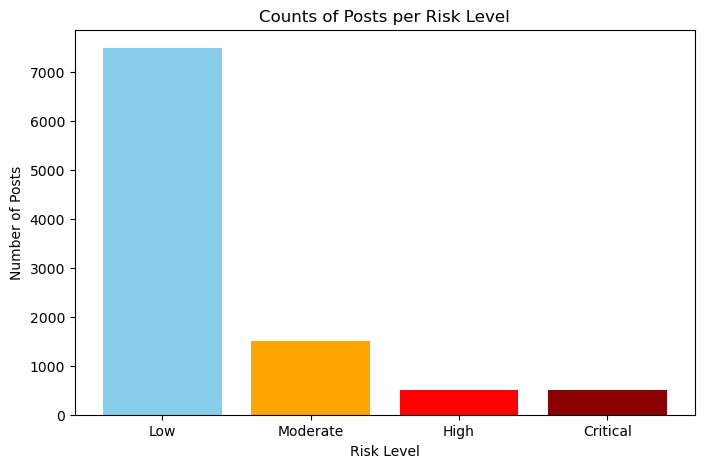

In [49]:
import matplotlib.pyplot as plt

# Bar chart of risk counts
plt.figure(figsize=(8,5))
risk_counts = df['risk_level'].value_counts().reindex(["Low","Moderate","High","Critical"])
colors = ["skyblue","orange","red","darkred"]

plt.bar(risk_counts.index, risk_counts.values, color=colors)
plt.xlabel("Risk Level")
plt.ylabel("Number of Posts")
plt.title("Counts of Posts per Risk Level")
plt.show()


**Track Mental Health Trends Over Time**

What it does: By analyzing posts chronologically, you can track changes in severity and sentiment over days, weeks, or months.

How it works:

Use the created_utc column to order posts by time.

Aggregate average severity, counts of high/critical posts, or average valence/arousal per day/week.

Plot time-series graphs to see increasing or decreasing trends in mental health risk.

Example scenario: Detect periods when posts from a particular subreddit show rising severity → signals increased community distress.

**Detect At-Risk Posts in Real Time**

What it does: Identify posts in the top 5–10% severity range as they are created.

How it works:

Compute severity scores for new posts.

Compare to your critical/high percentile thresholds (e.g., p95, p90).

Flag posts above these thresholds as at-risk.

Example scenario: A post with severity > p95 is immediately flagged for review or intervention, helping moderators or support teams respond quickly.

**Prioritize Posts for Intervention**

What it does: Focus resources on the posts most likely to indicate serious mental health challenges.

How it works:

Rank posts by severity or risk level.

Highlight Critical and High risk posts for urgent review.

Optionally, filter by subreddits or keywords relevant to specific mental health concerns.

Example scenario: A moderator dashboard shows posts sorted by severity, with High and Critical posts at the top, ensuring rapid support for those who need it most.

**Application 1: Track Mental Health Trends Over Time**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("output/reddit_with_valence_arousal_severity_with_risk.csv")

# Convert timestamp to datetime
df['created_utc'] = pd.to_datetime(df['created_utc'])

# Extract hour from timestamp
df['hour'] = df['created_utc'].dt.hour

# Count posts per hour by risk level
hourly_counts = df.groupby(['hour','risk_level']).size().unstack(fill_value=0)

# Ensure all risk levels are included
risk_levels = ['Low', 'Moderate', 'High', 'Critical']
for r in risk_levels:
    if r not in hourly_counts.columns:
        hourly_counts[r] = 0
hourly_counts = hourly_counts[risk_levels]  # reorder columns

hourly_counts


risk_level,Low,Moderate,High,Critical
hour,,,,
0,299,68,21,23
1,387,71,24,32
2,363,79,29,31
3,338,66,27,27
4,319,78,25,19
5,301,63,24,21
6,245,57,22,20
7,276,60,9,23
8,235,42,19,11


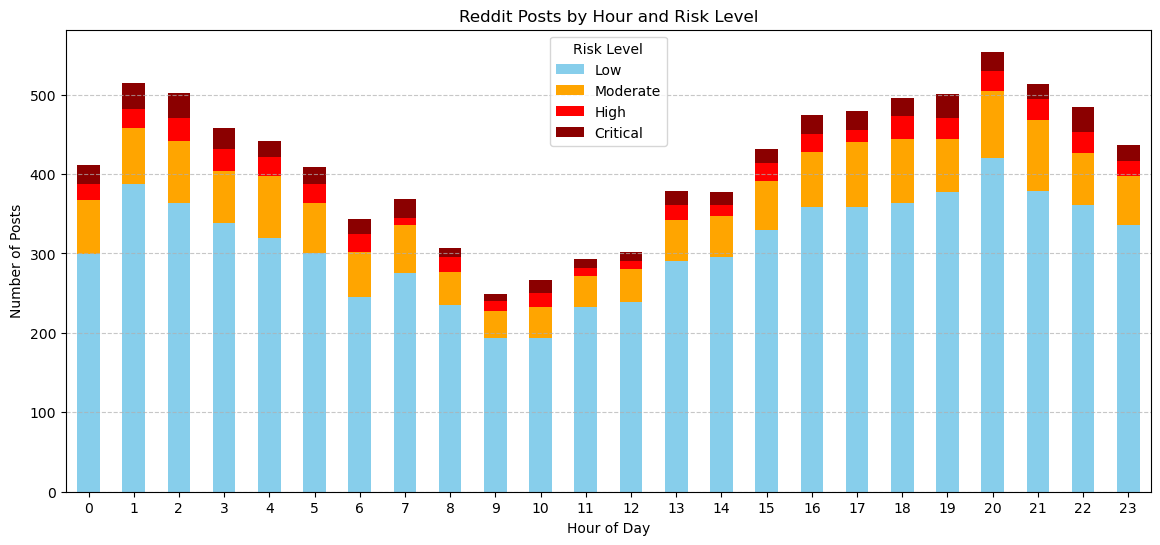

In [63]:
# Colors matching risk levels
colors = ['skyblue', 'orange', 'red', 'darkred']

hourly_counts.plot(kind='bar', stacked=True, color=colors, figsize=(14,6))

plt.xlabel("Hour of Day")
plt.ylabel("Number of Posts")
plt.title("Reddit Posts by Hour and Risk Level")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Risk Level")
plt.show()


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("output/reddit_with_valence_arousal_severity_with_risk.csv")

# Convert timestamp to datetime
df['created_utc'] = pd.to_datetime(df['created_utc'])

# Extract hour
df['hour'] = df['created_utc'].dt.hour

# Count Critical posts per hour
critical_counts = df[df['risk_level'] == 'Critical'].groupby('hour').size()

# Fill missing hours with 0
critical_counts = critical_counts.reindex(range(0,24), fill_value=0)

# Identify peak and lowest hours
peak_hour = critical_counts.idxmax()
lowest_hour = critical_counts.idxmin()

print(f"Hour with highest Critical posts: {peak_hour} ({critical_counts[peak_hour]} posts)")
print(f"Hour with lowest Critical posts: {lowest_hour} ({critical_counts[lowest_hour]} posts)")


Hour with highest Critical posts: 1 (32 posts)
Hour with lowest Critical posts: 9 (9 posts)


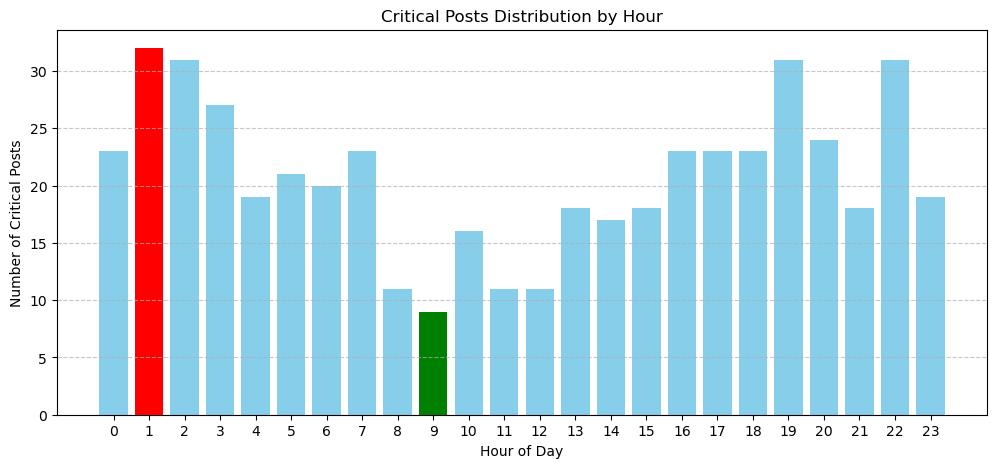

In [65]:
colors = ['skyblue']*24
colors[peak_hour] = 'red'        # Highlight peak hour
colors[lowest_hour] = 'green'    # Highlight lowest hour

plt.figure(figsize=(12,5))
plt.bar(critical_counts.index, critical_counts.values, color=colors)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Critical Posts")
plt.title("Critical Posts Distribution by Hour")
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Application 2: Distribution of severity across subreddits or user groups**

**On the basis of subreddits**

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load CSV
df = pd.read_csv("output/reddit_with_valence_arousal_severity_with_risk.csv")

# Compute mean severity per subreddit
subreddit_stats = df.groupby('subreddit').agg({
    'severity': ['mean', 'max'],
    'risk_level': lambda x: (x=='Critical').sum()  # count of Critical posts
}).reset_index()

# Flatten multi-level columns
subreddit_stats.columns = ['subreddit', 'mean_severity', 'max_severity', 'critical_count']

# Optional: keep top N subreddits with most posts for clarity
top_subreddits = df['subreddit'].value_counts().head(20).index
subreddit_stats = subreddit_stats[subreddit_stats['subreddit'].isin(top_subreddits)]


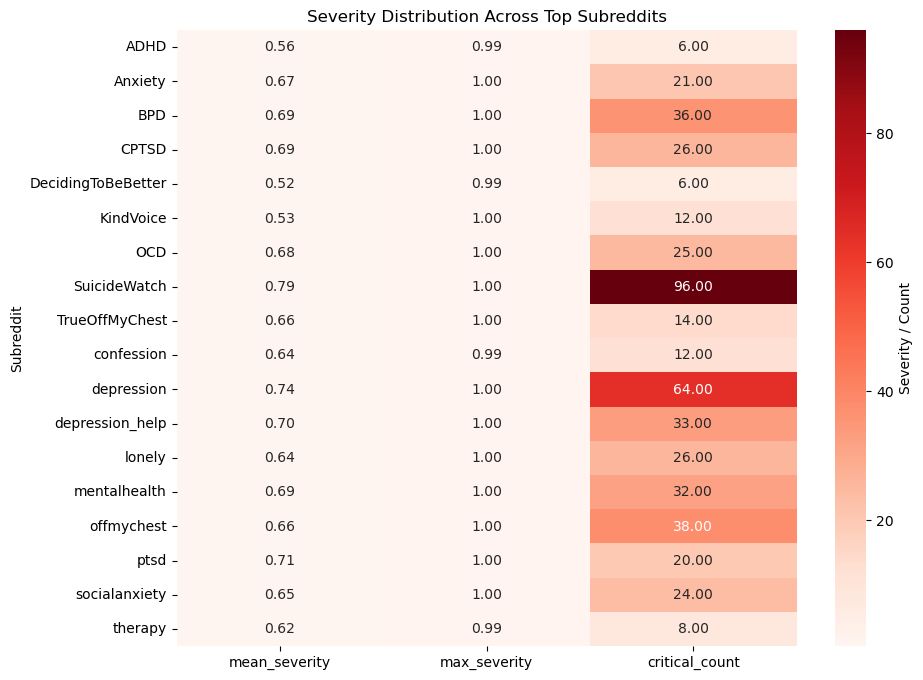

In [67]:
# Prepare matrix: rows=subreddit, columns=metrics
heatmap_data = subreddit_stats.set_index('subreddit')[['mean_severity', 'max_severity', 'critical_count']]

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Severity / Count'})
plt.title("Severity Distribution Across Top Subreddits")
plt.ylabel("Subreddit")
plt.show()


**On the basis of user group**

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load CSV
df = pd.read_csv("output/reddit_with_valence_arousal_severity_with_risk.csv")

# Optional: pick top N active users to make the plot readable
top_users = df['author'].value_counts().head(20).index
df_top_users = df[df['author'].isin(top_users)]

# Aggregate metrics per user
user_stats = df_top_users.groupby('author').agg({
    'severity': ['mean', 'max'],
    'risk_level': lambda x: (x=='Critical').sum()  # number of Critical posts
}).reset_index()

# Flatten multi-level columns
user_stats.columns = ['author', 'mean_severity', 'max_severity', 'critical_count']


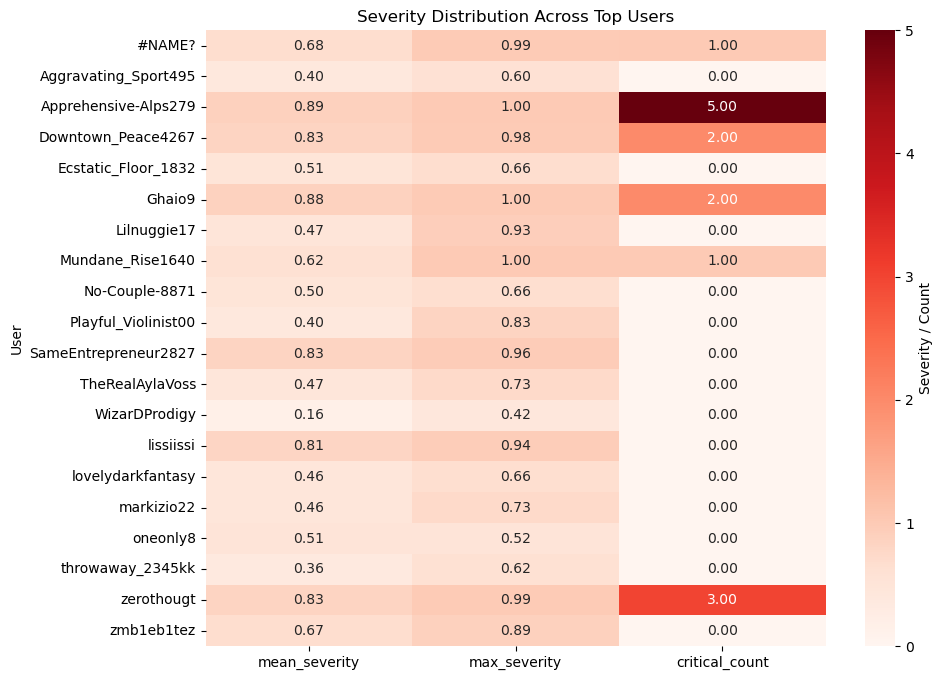

In [70]:
heatmap_data = user_stats.set_index('author')[['mean_severity', 'max_severity', 'critical_count']]

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Severity / Count'})
plt.title("Severity Distribution Across Top Users")
plt.ylabel("User")
plt.show()
